<a href="https://colab.research.google.com/github/asabbah44/K-means/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Steps for bulid K-means Clustering Algorithm**

1. Read the dataset 
2. Check if the dataset columns are more than 2 without a label column, then apply PCA for dimensionality reduction.
3. normalizes the data.
4. Determine the number K of clusters by invoking cost function
5. Initialize the cluster center k-means algorithm by randomly selecting C data points.
6. Find the Euclidean distances between each data point and the C cluster centers.
7. Based on the distance each data point is assigned to a cluster center (i.e., a label is assigned to the point).
8. Given a new value for cluster center location (C) calculate the average of the points in the 
cluster group
9. Repeat steps 4–6 until the cluster center datapoint stops changing (i.e., the difference between the cluster center and the new center zero), and get the best cluster center estimate.
10. A cost function is defined to get the best number of clusters.


Ahmed Sabbah, Birzeit University.





In [907]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1) Read the datasets.**

To run a specific dataset, change the ActiveDataset variable to the number of datasets.

* iris------------------------------> **1** 
* 3gaussians-std0.6 ----> **2**
* 3gaussians-std0.9 ----> **3**
* circles -----------------------> **4**
* Moons -----------------------> **5**



In [908]:
ActiveDataset=5

In [909]:

def ReadDataset(Adataset):
  if Adataset==1:
   print("iris dataset is active")
   DsPath ="/content/drive/MyDrive/Colab Notebooks/Machine Learning/K-Means/Datasets/iris.csv"
   Dataset=pd.read_csv(DsPath, names=['sepal_length','sepal_width','petal_length','petal_width','label'])
   return Dataset
  elif Adataset==2:
    print("3gaussians dataset with std 0.6 is active")
    DsPath ="/content/drive/MyDrive/Colab Notebooks/Machine Learning/K-Means/Datasets/3gaussians-std0.6.csv"

  elif Adataset==3:
    print("3gaussians dataset with std 0.9 is active")
    DsPath ="/content/drive/MyDrive/Colab Notebooks/Machine Learning/K-Means/Datasets/3gaussians-std0.9.csv"

  elif Adataset==4:
    print("Circles dataset is active" )
    DsPath ="/content/drive/MyDrive/Colab Notebooks/Machine Learning/K-Means/Datasets/circles.csv"

  elif Adataset==5:
    print("Moon dataset is active")
    DsPath = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/K-Means/Datasets/moons.csv"

  Dataset=pd.read_csv(DsPath, names=['f1','f2','label'])
  return Dataset


In [910]:
Dataset=ReadDataset(ActiveDataset)
Dataset.head(5)

Moon dataset is active


,f1,f2,label
0,-1.036507,0.392617,0.0
1,1.014714,0.177547,0.0
2,-0.661602,0.705367,0.0
3,-0.286087,0.967387,0.0
4,-0.790062,0.615586,0.0


In [911]:
Dataset.shape

(1000, 3)

In [912]:
d=Dataset.drop(['label'],axis=1)
d.describe()

,f1,f2
count,1000.000000,1000.000000
mean,0.499690,0.248688
std,0.871547,0.496743
min,-1.120606,-0.604452
25%,-0.043376,-0.202149
50%,0.507788,0.242695
75%,1.035700,0.710452
max,2.079038,1.101272


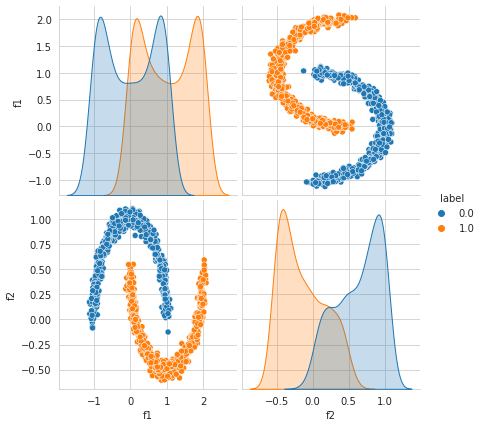

In [913]:
sns.set_style("whitegrid");
sns.pairplot(Dataset ,hue='label',height=3,corner=False )
plt.show()

Remove labels it should be last column

In [914]:
OrginalDataset=Dataset.copy()
labels=OrginalDataset.iloc[:,-1]
Dataset=Dataset.iloc[: , :-1]

In [915]:
Dataset

,f1,f2
0,-1.036507,0.392617
1,1.014714,0.177547
2,-0.661602,0.705367
3,-0.286087,0.967387
4,-0.790062,0.615586
...,...,...
995,1.621169,-0.259631
996,0.044461,0.314965
997,1.381059,-0.462813
998,-0.132196,0.986929


Covert to 2D if the dataset have more than two featuers 

In [916]:
from sklearn.decomposition import PCA
if(Dataset.shape[1]>2):
 pca=PCA(n_components=2)
 Dataset=pca.fit_transform(Dataset)
 Dataset=pd.DataFrame(Dataset)

In [917]:
print("Dataset shape--------------------------")
print(Dataset.shape)
print("New Dataset--------------------------")
Dataset.head(3)


Dataset shape--------------------------
(1000, 2)
New Dataset--------------------------


,f1,f2
0,-1.036507,0.392617
1,1.014714,0.177547
2,-0.661602,0.705367


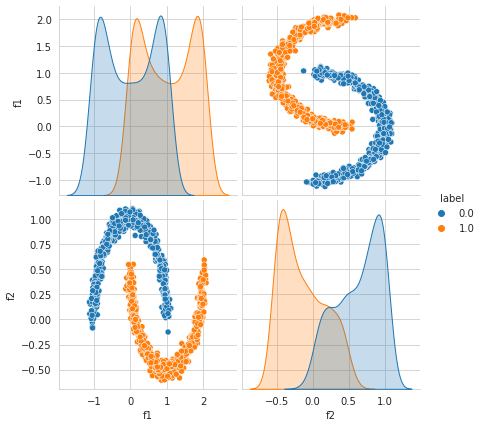

In [918]:
from pandas.core.internals import concat
sns.set_style("whitegrid");
d=pd.concat([Dataset,labels],axis=1)
sns.pairplot(d ,hue='label',height=3,corner=False )
plt.show()

Normalization the Dataset **Optional**

To normalizetion data change **Normalize to True**

In [919]:
Normalize=False
if(Normalize):
 Dataset=(Dataset-Dataset.min())/(Dataset.max()-Dataset.min())

In [920]:
Dataset.head(4)

,f1,f2
0,-1.036507,0.392617
1,1.014714,0.177547
2,-0.661602,0.705367
3,-0.286087,0.967387


In [921]:
Dataset.describe()

,f1,f2
count,1000.000000,1000.000000
mean,0.499690,0.248688
std,0.871547,0.496743
min,-1.120606,-0.604452
25%,-0.043376,-0.202149
50%,0.507788,0.242695
75%,1.035700,0.710452
max,2.079038,1.101272


In [922]:
x=Dataset.values

In [923]:
XO=Dataset.values
Xl=OrginalDataset.values

**Dataset befor and after normalization**



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


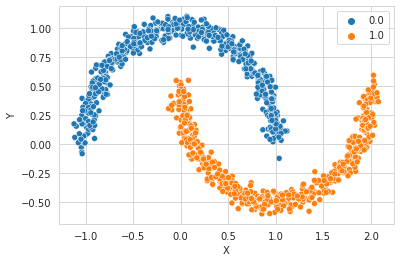

In [924]:
# Plot the row data point for 2D befor normalization 
import seaborn as sns
sns.scatterplot(Xl[:,0], Xl[:, 1], hue=Xl[:,-1] , color='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


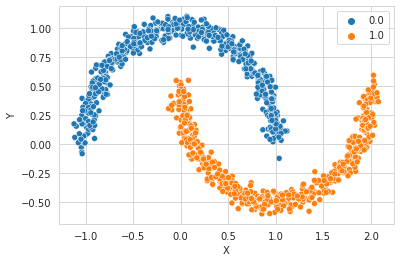

In [925]:
# Plot the row data point for 2D after normalization 
import seaborn as sns
sns.scatterplot(XO[:,0], XO[:, 1], hue=Xl[:,-1] , color='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# New Section


* Define the cluster center using Euclidean distance and initialize values random selected from Dataset.

In [926]:
def InitializeClusterCenters(data, k):
    return data.sample(n=k).values

In [927]:
def Euclidean_distance(Xc1, X1, Xc2, X2):
  return np.sqrt((Xc1-X1)**2 + (Xc2-X2)**2)



*Function to generate new cluster center*

In [928]:
def NewClusterCenter(X, U):
  return pd.DataFrame(X).groupby(by=U).mean().values

* K means function take the data points (dataset) and number of cluster center (K), and return the list of cluster centers as well as the membership list, where each item in the membership list belong to cluster i corresponds to a datapoint in the dataset. 

In [929]:
def kmeans(dataset, K ): 
      X=dataset.values 
      MemberShip = np.zeros(X.shape[0])
      ClusterCenters = InitializeClusterCenters(dataset,K)
      while True:
       
          for i, datapoint in enumerate(X):
              MinDesteance = float(X.max())
              # for each datapoint calculate euclidean distance of the datapoint from all Cluster center 
              for Xindex, centre in enumerate(ClusterCenters):
                  dest=Euclidean_distance(centre[0],datapoint[0],centre[1],datapoint[1] )
                  if MinDesteance > dest:
                    MinDesteance = dest
                    MemberShip[i] = Xindex # for each datapoint we save the same index in membership array and the value ofclustercenter
          
          NewCentre = NewClusterCenter(X,MemberShip)
          if np.count_nonzero(ClusterCenters-NewCentre) == 0: 
            break
          else:
            ClusterCenters = NewCentre

      return ClusterCenters, MemberShip

Cost function use is within-cluster sum of squares (WCSS) : is defined as the sum of the squared Euclidean distances between each data point and the mean of its cluster devided by number of datapoints.

In [930]:
def CostFunction(X, ClusterCenters, MemberShip):
  CostSum = 0
  X=X.values
  for i, datapoint in enumerate(X):
      CostFunction=Euclidean_distance(ClusterCenters[int(MemberShip[i]), 0], datapoint[0],ClusterCenters[int(MemberShip[i]), 1],datapoint[1] )
      CostSum += CostFunction
  CostSum/=len(X[: :1])
  return CostSum

To found the best number of clusters : 


1. Determine the maximum number of iterations, K, and begin from 1 to K.
2. If you need to stop early, set a value for epsilon; otherwise,  the loop will complete all iterations.
3. Don't change any other values.
4. When the difference between two sequences is less than or equal to epsilon, the loop will stop.



In [931]:
AllCosts = []
MaxIteration=10
epsilon=0.001
Iteration=1
for k in range(1,MaxIteration):
    FinalClusterCenter, MemberShips = kmeans(Dataset,k)
    CostSum = CostFunction(Dataset, FinalClusterCenter, MemberShips)
    AllCosts.append(CostSum)
    Iteration+=1
    if(k>=2 and epsilon!=0):
     Convearge=AllCosts[k-2]-AllCosts[k-1]
     if(Convearge<=epsilon):
      break

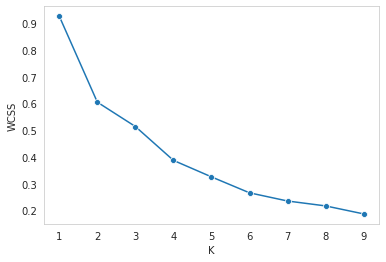

In [932]:
sns.lineplot(x=range(1,Iteration), y=AllCosts, marker='o')
plt.grid()
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

* Call K-means Function with the best K, from above figure.

In [933]:
FinalClusterCenter, MemberShips = kmeans(Dataset,K=5)

In [934]:
FinalClusterCenter

array([[ 0.41806311,  0.81050685],
       [-0.73302563,  0.57760307],
       [ 0.97359594, -0.27799783],
       [ 0.172708  ,  0.01166611],
       [ 1.82281944,  0.00392476]])

In [935]:
X=Dataset.values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


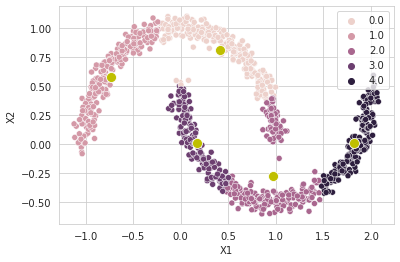

In [936]:
sns.scatterplot(X[:,0], X[:, 1], hue=MemberShips)
sns.scatterplot(FinalClusterCenter[:,0], FinalClusterCenter[:, 1], s=100, color='y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:

Calculate the average distance from all data points in the same cluster (xi).
Calculate the average distance from all data points in the closest cluster (yi).
Calculate the coefficient:

xi-yi/ max(xi,yi)


The coefficient take values [-1, 1].

Value 0 –> the sample is very close to the neighboring clusters.
It it is 1 –> the sample is far away from the neighboring clusters.
It it is -1 –> the sample is assigned to the wrong clusters.

The coefficients have to be as big as possible and close to 1 to have a good clusters.

In [937]:
from sklearn.metrics import silhouette_samples, silhouette_score
X_std=Dataset.values

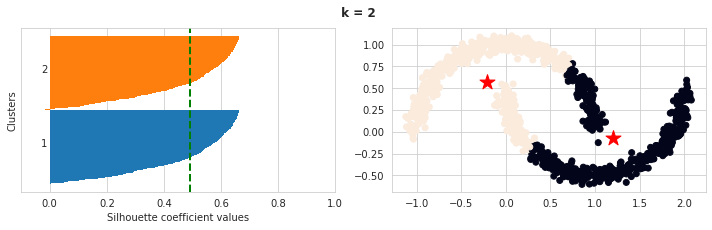

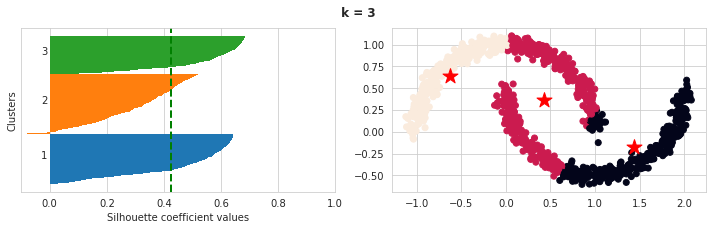

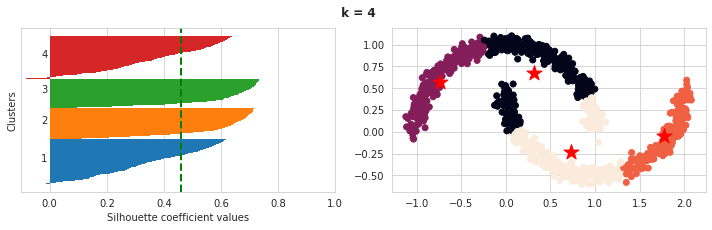

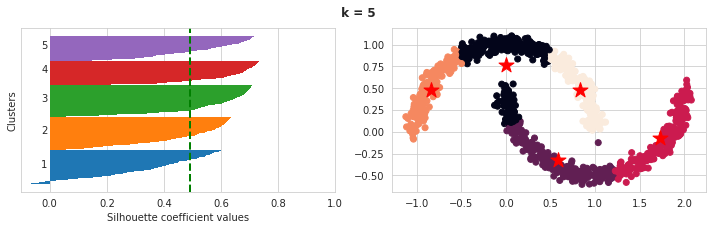

In [938]:
for i, kk in enumerate([2,3,4,5]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 3)
    FinalClusterCenter, MemberShips = kmeans(Dataset,K=kk)
    # Run the Kmeans algorithm
   
    #km =  KMeans(n_clusters=kk)
    labels = MemberShips
    centroids = FinalClusterCenter

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Clusters')
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    plt.tight_layout()
    plt.suptitle(f' k = {kk}',
                 fontsize=12, fontweight='semibold', y=1.05);